In [70]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [71]:
landmark_initEstimate = pd.read_csv("../data/results/vslam-set2-landmarks-initEstimate.csv", header=None).values
landmark_results = pd.read_csv("../data/results/vslam-set2-landmarks.csv", header=None).values
landmark_reference = pd.read_csv("../data/vslam_set2/features/features.txt", header=None, delimiter=" ").values

errs = np.zeros((1, 3))
for result in landmark_initEstimate:
    errs += np.abs(landmark_reference[int(result[0])-1][1:] - result[1:])
errs = errs / len(landmark_results)
print("init estimate err: ", errs)

errs = np.zeros((1, 3))
for result in landmark_results:
    errs += np.abs(landmark_reference[int(result[0])-1][1:] - result[1:])
errs = errs / len(landmark_results)
print("optimization err: ", errs)


init estimate err:  [[8.28690909e-05 3.45205273e-02 3.70221582e-02]]
optimization err:  [[0.00655184 0.01823005 0.02175947]]


In [72]:
n_pose = 6
epsilon = 0.1
for i in range(1, n_pose+1):
    measurement_results = pd.read_csv("../data/results/" + str(i) + ".csv", header=None).values
    measurement_reference = pd.read_csv("../data/vslam_set2/00000" + str(i) + ".txt", header=None, delimiter=" ", skiprows=[0,1]).values
    for j in range(len(measurement_results)):
        if (measurement_results[j][0] != measurement_reference[j][0]):
            print("landmark index incorrect: poseIdx={:d}, expect={:.2f}, got={:.2f}".format(i, measurement_reference[j][0], measurement_results[j][0])) 
        if (abs(measurement_results[j][1] - measurement_reference[j][1]) > epsilon or abs(measurement_results[j][2] - measurement_reference[j][2]) > epsilon):
            print(measurement_results[j][0], measurement_reference[j][0])
            print("measurement incorrect: poseIdx={:d}, expect={:.2f},{:.2f}, got={:.2f},{:.2f}".format(i, measurement_reference[j][0], measurement_reference[j][1], measurement_reference[j][2], measurement_results[j][1], measurement_results[j][2]))

In [73]:
measurement_reference

array([[  1.      , 542.838434, 208.267277],
       [  2.      , 151.224655, 263.206274],
       [  4.      , 303.811963, 233.792225],
       [  5.      , 635.406451, 286.938294],
       [  8.      , 137.953125, 220.246498],
       [  9.      , 218.974268, 218.202631],
       [ 10.      , 188.799214, 224.659466],
       [ 12.      , 538.392109, 274.765708],
       [ 13.      , 464.770761, 245.177234],
       [ 15.      , 554.900693, 162.446049],
       [ 17.      , 248.139805, 411.222947],
       [ 18.      ,  39.461024, 302.065957],
       [ 19.      , 608.983222, 302.190519],
       [ 20.      , 350.524415, 251.413706],
       [ 23.      , 629.219032, 254.522066],
       [ 24.      , 168.463194, 297.912102],
       [ 25.      ,  50.185381, 125.238265],
       [ 26.      ,  51.56888 , 123.571789],
       [ 27.      , 630.818868, 255.24062 ],
       [ 29.      , 534.811603, 312.142308],
       [ 31.      , 375.121089, 214.578088],
       [ 36.      , 556.65547 , 322.927896],
       [ 3

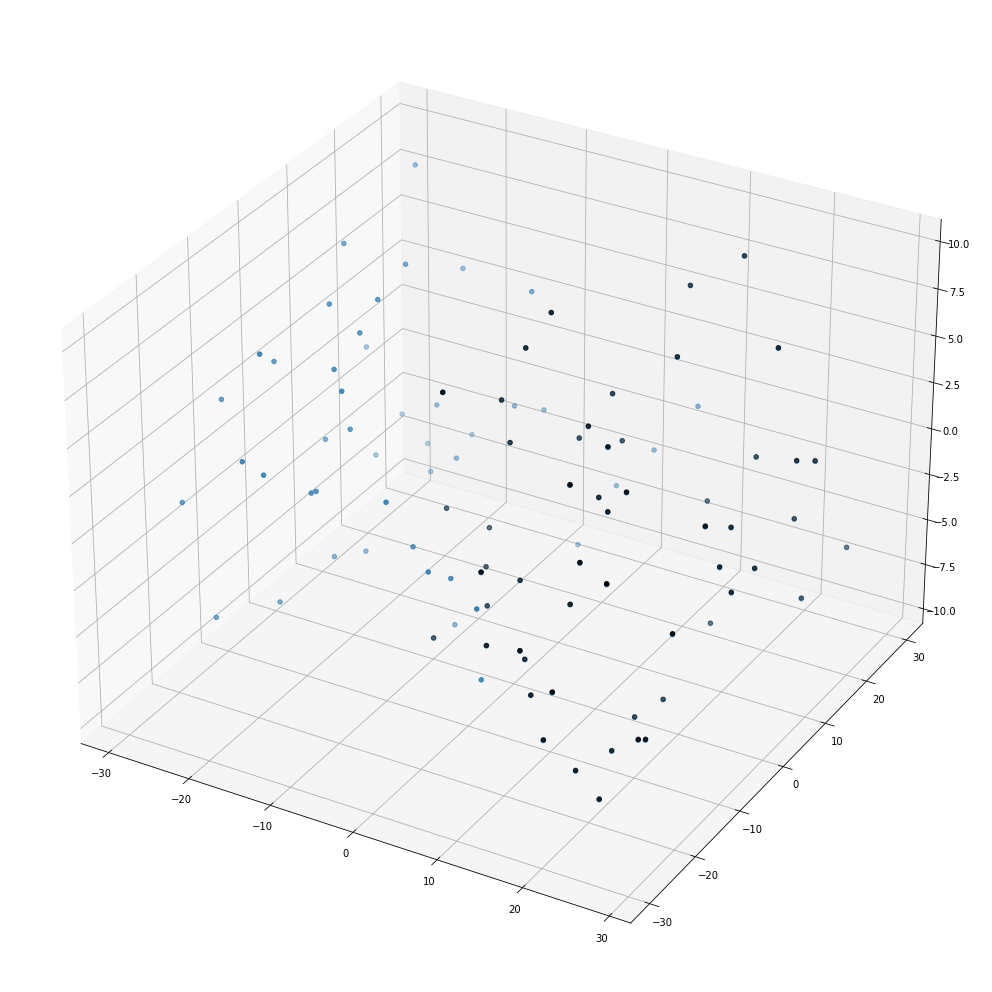

In [74]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(projection='3d')
ax.scatter(landmark_reference[:,1], landmark_reference[:,2], landmark_reference[:,3])
ax.scatter(landmark_results[:,1], landmark_results[:,2], landmark_results[:,3], color="black")

In [28]:
np.round(landmark_results, 2)

array([[ 1.000e+00,  1.888e+01, -2.021e+01,  2.930e+00],
       [ 2.000e+00,  2.435e+01,  1.769e+01, -2.370e+00],
       [ 4.000e+00,  2.480e+01,  1.760e+00,  7.300e-01],
       [ 5.000e+00,  7.940e+00, -2.003e+01, -2.960e+00],
       [ 8.000e+00,  2.810e+00,  9.280e+00,  1.020e+00],
       [ 9.000e+00,  2.745e+01,  1.140e+01,  2.500e+00],
       [ 1.000e+01,  2.789e+01,  1.496e+01,  1.820e+00],
       [ 1.200e+01,  2.824e+01, -2.493e+01, -3.920e+00],
       [ 1.300e+01,  2.743e+01, -1.621e+01, -5.600e-01],
       [ 1.500e+01,  1.802e+01, -2.080e+01,  6.930e+00],
       [ 1.700e+01, -4.690e+00,  2.320e+00, -5.470e+00],
       [ 1.800e+01,  2.494e+01,  2.982e+01, -6.540e+00],
       [ 1.900e+01,  1.753e+01, -2.524e+01, -5.410e+00],
       [ 2.000e+01,  2.757e+01, -3.380e+00, -1.250e+00],
       [ 2.300e+01,  2.095e+01, -2.969e+01, -1.350e+00],
       [ 2.400e+01,  2.604e+01,  1.655e+01, -6.230e+00],
       [ 2.500e+01,  1.072e+01,  1.907e+01,  8.120e+00],
       [ 2.600e+01,  1.546e+01,